In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Dev_ATT.csv")

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# --- Convert all numeric-looking columns safely ---
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Ignore non-numeric ones

# --- Handle missing values ---
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill numeric columns with mean
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# --- Drop duplicates ---
df = df.drop_duplicates().reset_index(drop=True)

# --- Remove outliers (IQR method) ---
def remove_outliers_iqr(data, col):
    if data[col].dtype not in ['int64', 'float64']:
        return data
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

df.reset_index(drop=True, inplace=True)


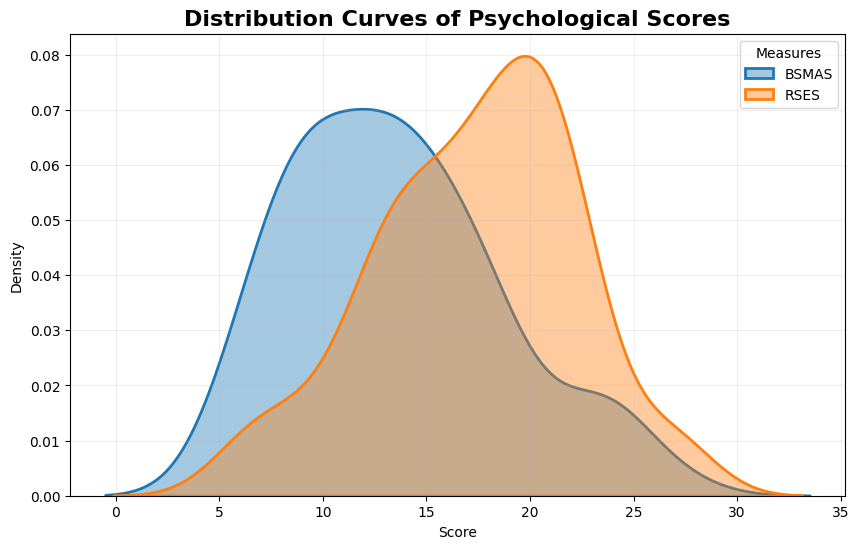

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top numeric psychological columns if present
score_cols = [col for col in df.columns if col.upper() in ['BSMAS', 'RSES', 'CSIQ_A', 'STAI_Y_1', 'STAI_Y_2']]

plt.figure(figsize=(10,6))
for col in score_cols:
    sns.kdeplot(df[col], fill=True, label=col, alpha=0.4, linewidth=2)

plt.title("Distribution Curves of Psychological Scores", fontsize=16, weight='bold')
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Measures")
plt.grid(alpha=0.2)
plt.show()


In [ ]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness and kurtosis
stats_df = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Skewness': df[numeric_cols].apply(skew),
    'Kurtosis': df[numeric_cols].apply(kurtosis)
})

print("📈 Descriptive Statistics (Central Tendency + Shape):")
print(stats_df.round(3))


/usr/local/lib/python3.12/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


📈 Descriptive Statistics (Central Tendency + Shape):
                                        Mean  Median  Skewness  Kurtosis
Sex                                    1.554     2.0    -0.217    -1.953
Age                                   17.541    18.0    -0.064    -0.650
School failure                         0.378     0.0     0.502    -1.748
WhatsApp                               1.000     1.0       NaN       NaN
Facebook                               0.000     0.0       NaN       NaN
Instagram                              1.000     1.0       NaN       NaN
Twitter                                0.000     0.0       NaN       NaN
Snapchat                               0.000     0.0       NaN       NaN
TikTok                                 0.216     0.0     1.379    -0.099
Other social                           0.000     0.0       NaN       NaN
Time spent on social media             1.541     1.0     0.303    -0.750
Daily use of social media              1.000     1.0       NaN       Na

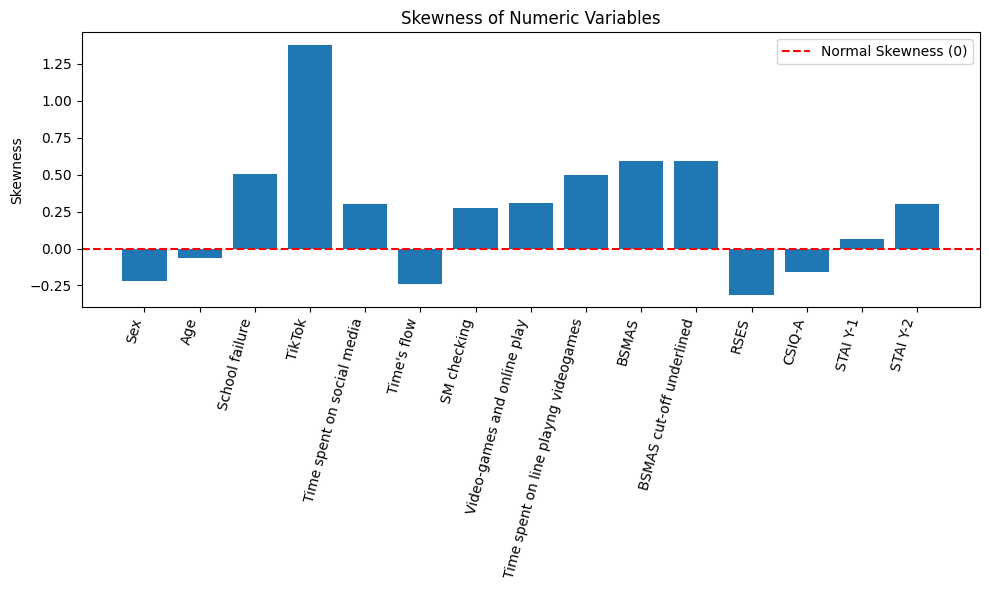

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# remove columns that are constant or all NaN
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1].dropna(axis=1, how='all')

# calculate skewness
skew_values = numeric_df.apply(lambda x: skew(x.dropna()), axis=0)

# plot
plt.figure(figsize=(10,6))
plt.bar(skew_values.index, skew_values.values)
plt.axhline(y=0, color='r', linestyle='--', label='Normal Skewness (0)')
plt.xticks(rotation=75, ha='right')
plt.title('Skewness of Numeric Variables')
plt.ylabel('Skewness')
plt.legend()
plt.tight_layout()
plt.show()


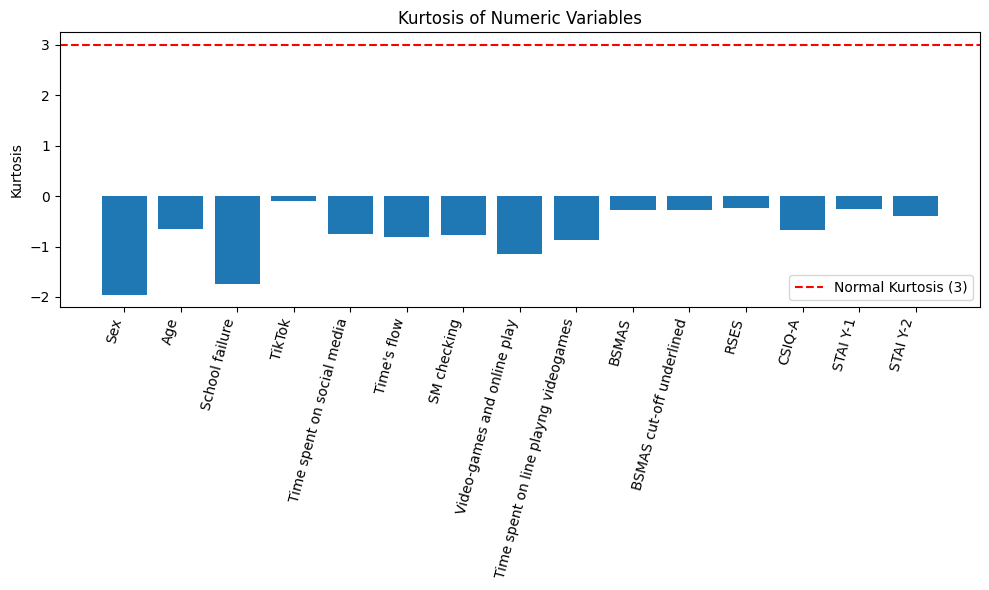

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# remove columns that are constant or all NaN
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1].dropna(axis=1, how='all')

# calculate kurtosis
kurtosis_values = numeric_df.apply(lambda x: kurtosis(x.dropna()), axis=0)

# plot
plt.figure(figsize=(10,6))
plt.bar(kurtosis_values.index, kurtosis_values.values)
plt.axhline(y=3, color='r', linestyle='--', label='Normal Kurtosis (3)')
plt.xticks(rotation=75, ha='right')
plt.title('Kurtosis of Numeric Variables')
plt.ylabel('Kurtosis')
plt.legend()
plt.tight_layout()
plt.show()


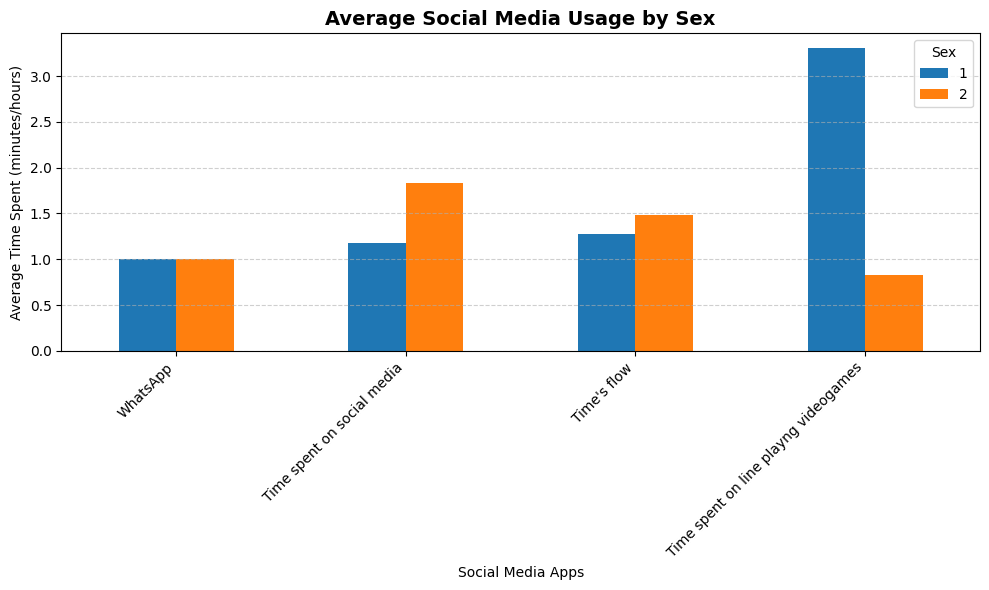

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean and standardize the 'Sex' column
df['Sex'] = df['Sex'].astype(str).str.strip().str.lower()
df['Sex'] = df['Sex'].replace({
    'm': 'Male', 'male': 'Male',
    'f': 'Female', 'female': 'Female'
})

# Step 2: Select columns related to social media usage
social_media_cols = [col for col in df.columns if 'Time' in col or 'Usage' in col or 'App' in col]

# Step 3: Group by Sex and take mean
sex_usage = df.groupby('Sex')[social_media_cols].mean()

# Step 4: Plot
sex_usage.T.plot(kind='bar', figsize=(10,6))
plt.title('Average Social Media Usage by Sex', fontsize=14, fontweight='bold')
plt.ylabel('Average Time Spent (minutes/hours)')
plt.xlabel('Social Media Apps')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<>:63: SyntaxWarning: invalid escape sequence '\d'
<>:63: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-486077182.py:63: SyntaxWarning: invalid escape sequence '\d'
  df['Usage_Level'] = df['Time spent on social media'].astype(str).str.extract('(\d+)').astype(float)
/tmp/ipython-input-486077182.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sex', y=col, palette='pastel')
/tmp/ipython-input-486077182.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sex', y=col, palette='pastel')
/tmp/ipython-input-486077182.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

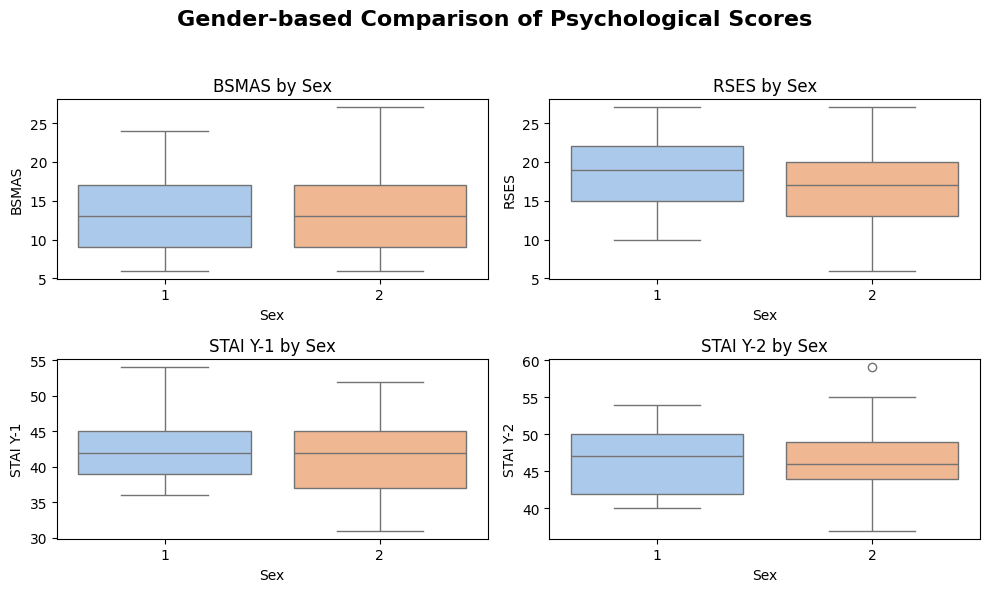

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


BSMAS: p-value = nan --> No significant difference
RSES: p-value = nan --> No significant difference
STAI Y-1: p-value = nan --> No significant difference
STAI Y-2: p-value = nan --> No significant difference


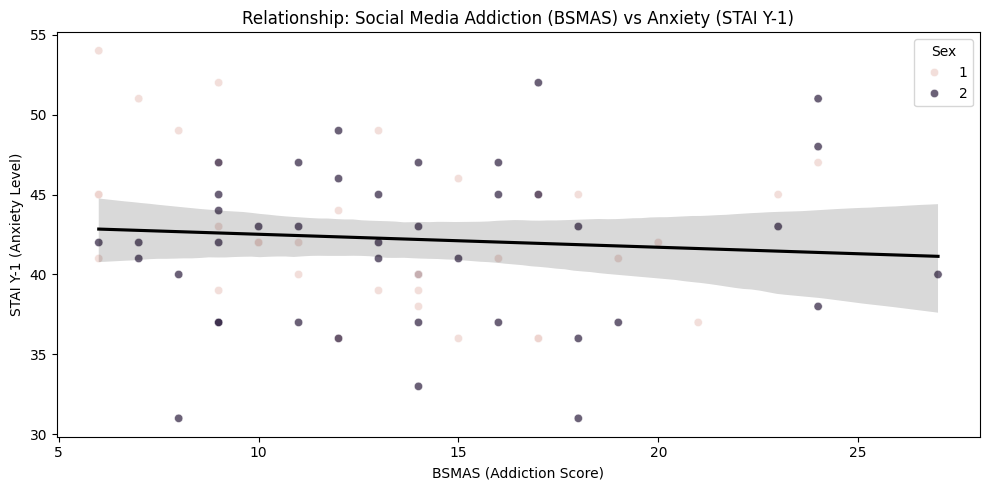

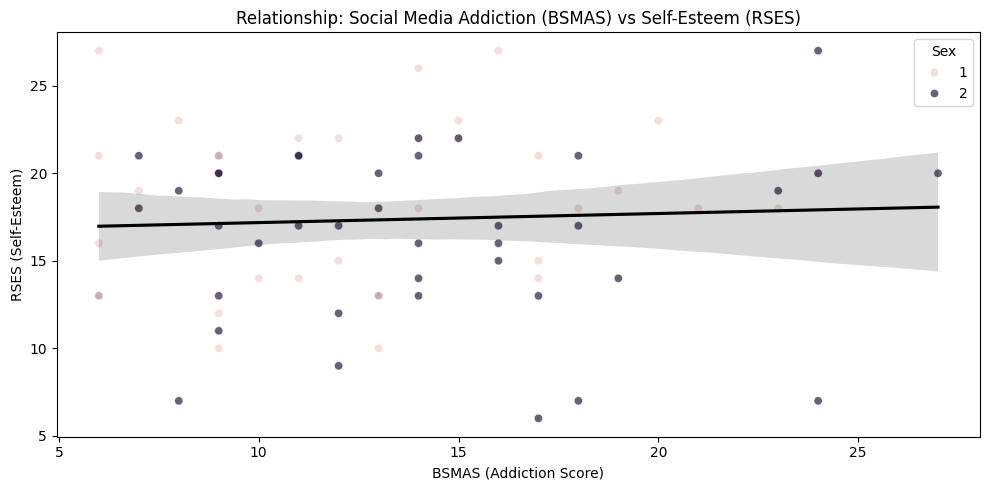

/tmp/ipython-input-486077182.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_summary = df.groupby('Usage_Category')[['BSMAS','RSES','STAI Y-1']].mean()



Average Scores by Usage Category:
                     BSMAS       RSES   STAI Y-1
Usage_Category                                 
Low             13.390244  17.780488  42.195122
Medium          14.500000  17.200000  41.600000
High            12.461538  16.307692  43.307692


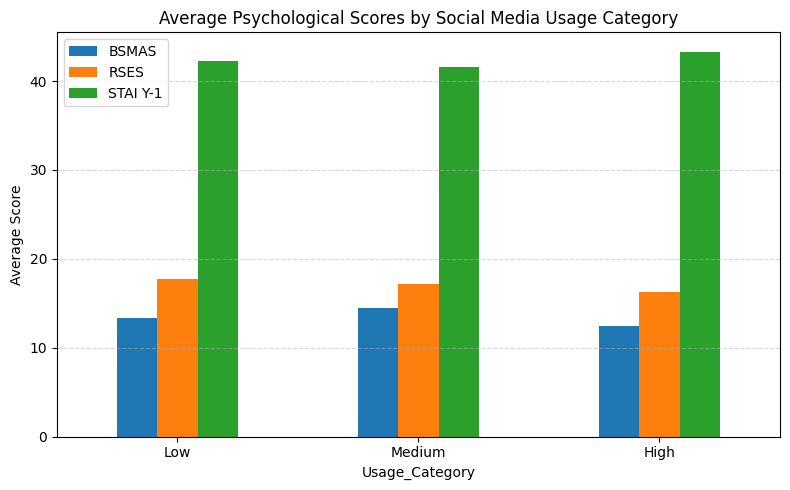

In [ ]:
# ==============================================================
# ADVANCED ANALYSIS & COMPARISON VISUALIZATIONS
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# ==============================================================
# 1️⃣ GENDER-BASED PSYCHOLOGICAL SCORE COMPARISON
# ==============================================================

score_cols = ['BSMAS', 'RSES', 'STAI Y-1', 'STAI Y-2']

plt.figure(figsize=(10,6))
for i, col in enumerate(score_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x='Sex', y=col, palette='pastel')
    plt.title(f'{col} by Sex')
    plt.xlabel('Sex')
    plt.ylabel(col)
plt.suptitle("Gender-based Comparison of Psychological Scores", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Quick statistical insight (t-test)
male = df[df['Sex']=='Male']
female = df[df['Sex']=='Female']
for col in score_cols:
    t, p = ttest_ind(male[col], female[col], equal_var=False)
    print(f"{col}: p-value = {p:.4f} --> {'Significant difference' if p<0.05 else 'No significant difference'}")

# ==============================================================
# 2️⃣ ADDICTION (BSMAS) VS ANXIETY & SELF-ESTEEM
# ==============================================================

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='BSMAS', y='STAI Y-1', hue='Sex', alpha=0.7)
sns.regplot(data=df, x='BSMAS', y='STAI Y-1', scatter=False, color='black')
plt.title("Relationship: Social Media Addiction (BSMAS) vs Anxiety (STAI Y-1)")
plt.xlabel('BSMAS (Addiction Score)')
plt.ylabel('STAI Y-1 (Anxiety Level)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='BSMAS', y='RSES', hue='Sex', alpha=0.7)
sns.regplot(data=df, x='BSMAS', y='RSES', scatter=False, color='black')
plt.title("Relationship: Social Media Addiction (BSMAS) vs Self-Esteem (RSES)")
plt.xlabel('BSMAS (Addiction Score)')
plt.ylabel('RSES (Self-Esteem)')
plt.tight_layout()
plt.show()

# ==============================================================
# 3️⃣ CATEGORICAL COMPARISON: TIME SPENT GROUPS (LOW/MEDIUM/HIGH)
# ==============================================================

# Convert time spent to ordered categories (based on your column)
if 'Time spent on social media' in df.columns:
    df['Usage_Level'] = df['Time spent on social media'].astype(str).str.extract('(\d+)').astype(float)
    df['Usage_Category'] = pd.qcut(df['Usage_Level'], 3, labels=['Low', 'Medium', 'High'])

    usage_summary = df.groupby('Usage_Category')[['BSMAS','RSES','STAI Y-1']].mean()
    print("\nAverage Scores by Usage Category:\n", usage_summary)

    usage_summary.plot(kind='bar', figsize=(8,5))
    plt.title("Average Psychological Scores by Social Media Usage Category")
    plt.ylabel("Average Score")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ==============================================================
# 4️⃣ ANXIETY VS LONELINESS RELATIONSHIP
# ==============================================================

if 'Perceived anxiety' in df.columns and 'Perceived loneliness' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Perceived anxiety', y='Perceived loneliness', hue='Sex', alpha=0.7)
    plt.title("Relationship Between Perceived Anxiety and Loneliness")
    plt.xlabel("Perceived Anxiety")
    plt.ylabel("Perceived Loneliness")
    plt.tight_layout()
    plt.show()
